In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import re

In [76]:
with open('history.txt','r') as f:
    history_txt=f.read()#.replace('\n', '')

In [77]:
epochs_lines=history_txt.split('Epoch')

In [78]:
def get_epoch_values(epoch):
    lines=epoch.split(' - ')
    losses=[]
    dices=[]
    for line in lines:
        if 'loss:' in line:
            losses.append(float(line.split(':')[1].strip()))
        if 'dice_coefficient' in line:
            #print(line.split(':')[1].split('\n')[0].strip())
            dices.append(float(line.split(':')[1].split('\n')[0].strip()))
    loss=sum(losses)/len(losses)
    dice=sum(dices)/len(dices)
    
    return loss, dice

In [79]:
epochs=[]
loss=[]
dice=[]
counter=0

for epoch in epochs_lines:
    if ('loss ' in epoch) or ('ReduceLROnPlateau' in epoch):
        pass
        #print(epoch)
    else:
        values=get_epoch_values(epoch)
        epochs.append(counter)
        loss.append(values[0])
        dice.append(values[1])
        counter=counter+1

In [80]:
len(epochs)

921

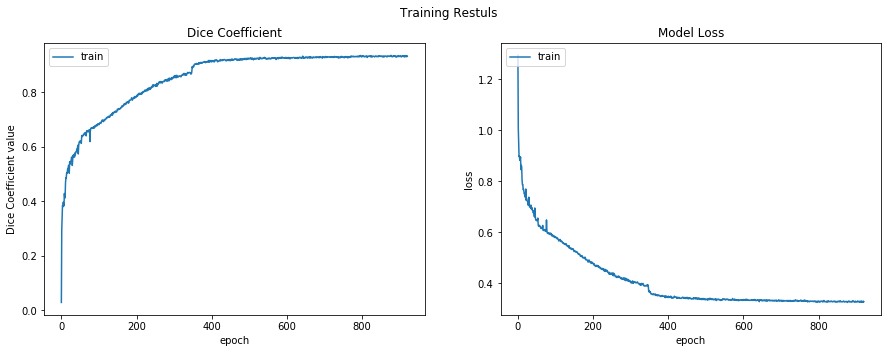

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))
fig.suptitle('Training Restuls')
#plt.figure(figsize=(30,20))
# summarize history for accuracy
ax1.plot(epochs,dice)
ax1.set_title('Dice Coefficient')
ax1.set_ylabel('Dice Coefficient value')
ax1.set_xlabel('epoch')
ax1.legend(['train'], loc='upper left')
#plt.show()
# summarize history for loss
ax2.plot(epochs,loss)
ax2.set_title('Model Loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train'], loc='upper left')
plt.show()
